# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [343]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
from scipy.stats import normaltest,norm
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest


In [1]:


df = pd.read_csv('data/human_body_temperature.csv')

/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/leilasapple/.matplotlib/matplotlibrc", line #621
  (fname, cnt))


## Looking at data

In [229]:
# Your work here.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [49]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [50]:
df[df.gender=='F'].describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [51]:
df[df.gender=='M'].describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


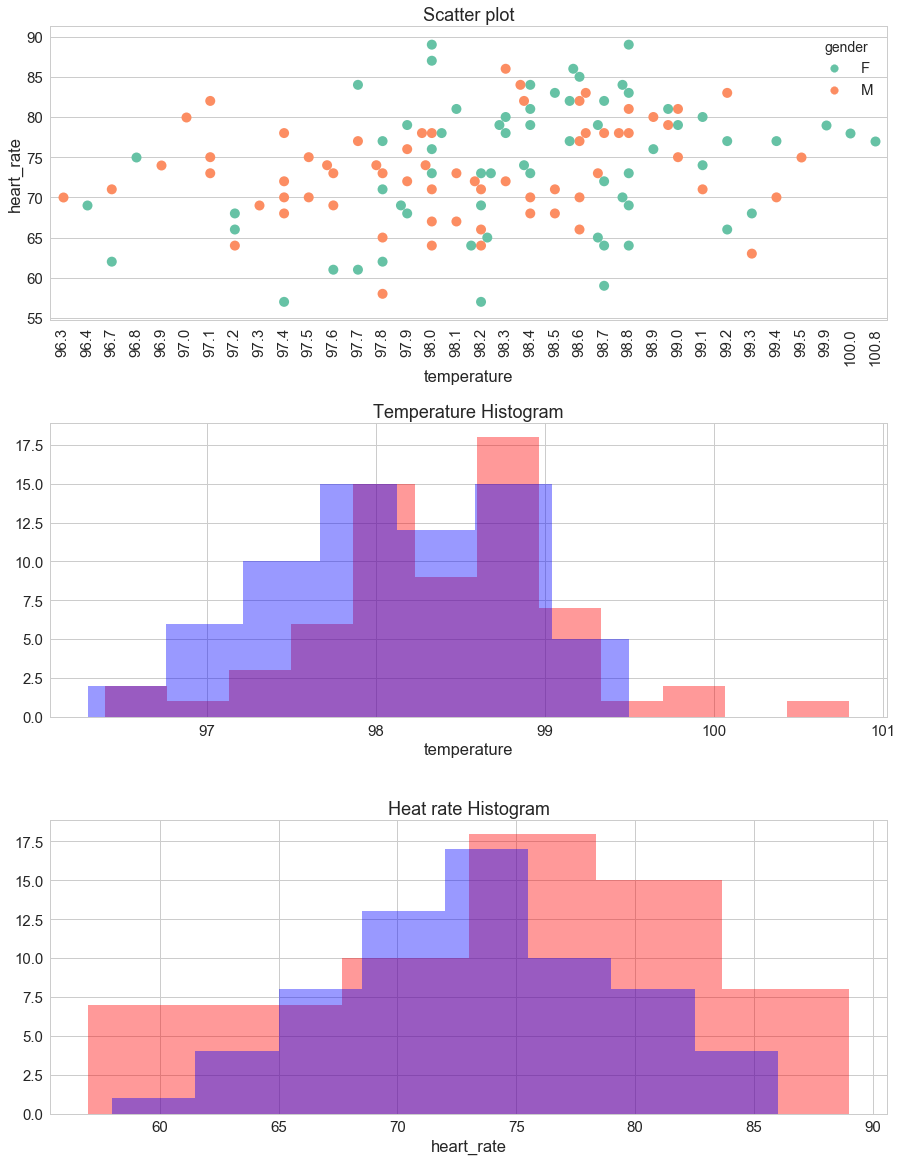

In [226]:


# add a red subplot that shares the x-axis with ax1
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig ,axes = plt.subplots(3,1,figsize=(15,20))
fig.subplots_adjust(hspace=.35)

fig=sns.swarmplot(y="heart_rate",hue="gender", x="temperature", data=df,size=10, palette="Set2", ax=axes[0])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
axes[0].set_title("Scatter plot")

sns.distplot(df.temperature[df.gender=='F'],ax=axes[1],label='Female',color='red',kde = False)
sns.distplot(df.temperature[df.gender=='M'],ax=axes[1],label='Male',color='blue',kde = False)
axes[1].set_title("Temperature Histogram")

sns.distplot(df.heart_rate[df.gender=='F'],ax=axes[2],kde=False,label='Female',color='red',norm_hist=False)
sns.distplot(df.heart_rate[df.gender=='M'],ax=axes[2],kde=False,label='Male',color='blue',norm_hist=False)
axes[2].set_title("Heat rate Histogram")

plt.show()
plt.close()

## Answer to Q1: Is the distribution of body temperatures normal?

### Using ecdf

In [233]:
#calculating cdf of a normal distribution from given mean and standard deviation
norm_cdf = norm.cdf(np.sort(df.temperature),loc=np.mean(df.temperature),scale=np.std(df.temperature))

#Claculatin cdf of an empirical data
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [237]:
xtemp_ecdf, ytemp_ecdf = ecdf(df.temperature)

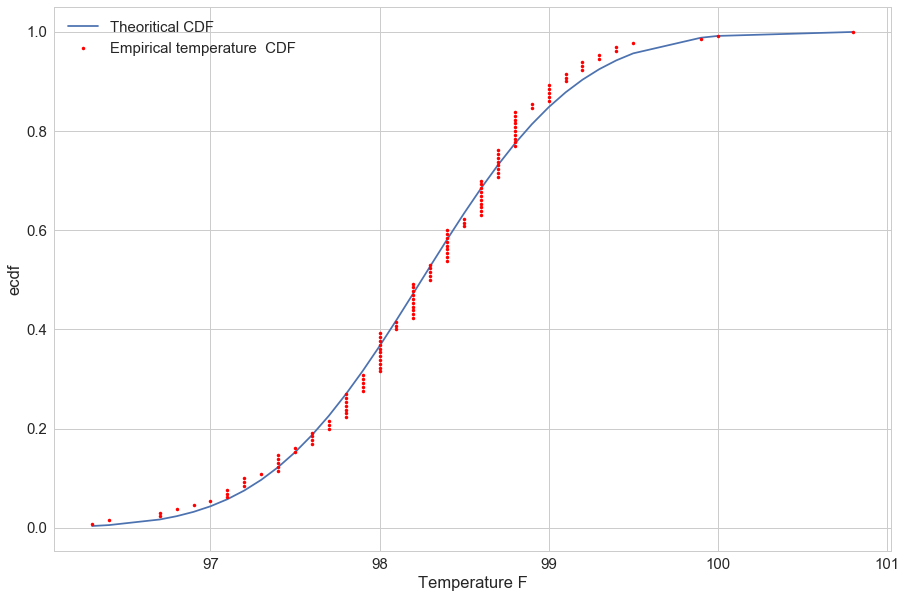

In [267]:
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig = plt.plot(np.sort(df.temperature), norm_cdf)
fig = plt.plot(xtemp_ecdf, ytemp_ecdf, marker='.', linestyle='none',color='red')
fig = plt.xlabel('Temperature F')
fig = plt.ylabel('ecdf')
fig = plt.legend(['Normal CDF', 'Empirical temperature  CDF'])

plt.show()
plt.close()

### Using pyhton packages and Chi-square and p-value test

In [256]:
#https://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used
statistic, p_val = normaltest(df['temperature'])
alpha = 0.05
print('Chi-square statistic:',statistic)
print('p value =',p_val)
if p_val < alpha:
    print("The null hypothesis can be rejected")
else : print("The null hypothesis cannot be rejected")

Chi-square statistic: 2.70380143332
p value = 0.258747986349
The null hypothesis cannot be rejected


The p-value is larger than 0,.05 therefore the null hypothesis can not be rejected, so the distribution is normal. 

## Answer to Q2: Is the sample size large? Are the observations independent?

There is 130 data. According to [Determining Sample Size](https://www.qualtrics.com/experience-management/research/determine-sample-size/), to define the number of sample, we need to know the cofidnece level of the data, population size, and margine of the error. An adequate sample size can be obtained from :

Necessary Sample Size = (Z-score)2 * StdDev*(1-StdDev) / (margin of error)2

If We take a confidence level of 90% ( Z Score = 1.645) and margin of error = %5, the sample size must be at least 200. 

Also we have no information about the sampling proceedure was with replace.


## Answer Q3: Is the true population mean really 98.6 degrees F?

- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  tt  or  zz  statistic?
- Now try using the other test. How is the result be different? Why?



### 3-1: bootstrap hypothesis test

the confidence level of bootstrap smapling is : [ 98.47382692  98.72769231]
P-value of bootstrap testing: 0.0


/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/leilasapple/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


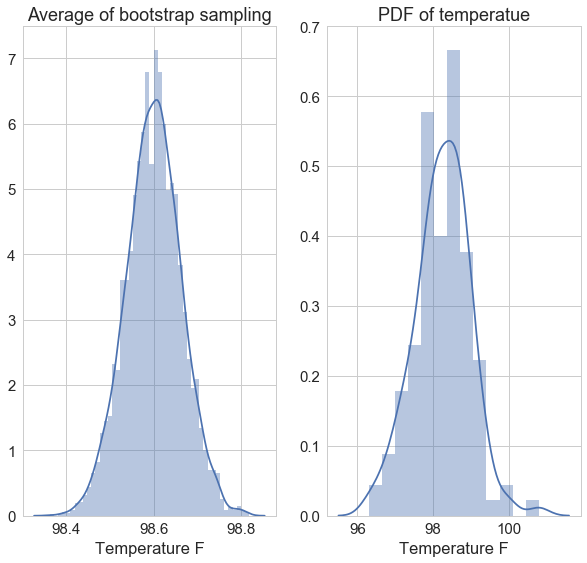

In [329]:
#creating bootstrap smapling from 98.6  
temp_shifted=df.temperature-np.mean(df.temperature)+98.6
bs_replicates = np.empty(5000)
for i in range(5000):
    bs_replicates[i]=np.mean(np.random.choice(temp_shifted,130))
#confidence level of our sampling
print('the confidence level of bootstrap smapling is :',np.percentile(bs_replicates,[2.5,97.5]))
#ploting the sampled data
fig ,axes = plt.subplots(1,2,figsize=(10,9))
fig = sns.distplot(bs_replicates,hist=True,ax=axes[0])
axes[0].set_title('Average of bootstrap sampling')
axes[0].set_xlabel('Temperature F')

fig = sns.distplot(df.temperature,hist=True,ax=axes[1])
axes[1].set_title('PDF of temperatue')
axes[1].set_xlabel('Temperature F')
# Testing the theory
#The eman value of the original dta  is 98.3 which is less than 98.6

bs_pvalue = np.sum(bs_replicates<np.mean(df.temperature))/5000.0
print('P-value of bootstrap testing:',bs_pvalue)

- In the graphs it can be seen that the minimum of botstrap test samples are larger than the average of the original data, 98.3.
- The p-value is 0. It shows that the theory is not true meaning true population body temperatue is not 98.6.

### 3-2: 
Here we have the average of houman body temperature, 98.6 F$^{\circ}$. We need to test our sample against known value, therefore , we need only one-sample test. 

### 3-3: 
Since 
- we don't have the all population statistic information 
- there is only one set of sample data
- we don't know the population standard deviation
- the sample size is small

, we need to use t-statistic rather than using z-statistic. 

### 3-4: 
The null hypothesis is avrage population body temperature is 98.6$F^{\circ}$. The alternative hypothesis can be the opposite, which may say the average is not the given value. In summary, if $\mu$ is the average of body temperature of population then we have: $$ H_{0} : \mu=98.6 \\ H_a : \mu\neq98.6$$ We take significance level,$\alpha$, to be 0.05 and if the $p_{value}<\alpha$ then the null hypotesis can be rejected meaning the average of body temperature is not 98.6.

### 3-5: 
We can use t-test to check if we can reject the null hypothesis or not.

#### T-test

In [328]:
#using python stat package
mu = 98.6

t_stat, t_pval = stats.ttest_1samp(a=df['temperature'], popmean=mu)
print('t-statistic:',t_stat)
print('p value =',t_pval)

t-statistic: -5.45482329236
p value = 2.41063204156e-07


The p-value is much smaller than 0.05, then the null hypotesis is not rejected. Hence, true population mean is not 98.6 $   F^\circ$. 
The result is not similar to the result of bootstrap testing. 

## Answer Q4: 
1. Draw a small sample of size 10 from the data and repeat both frequentist tests.
2. Which one is the correct one to use?
3. What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

### 4-1:
[Z-test](https://ipython-books.github.io/72-getting-started-with-statistical-hypothesis-testing-a-simple-z-test/) is simply explained in [IPython Cookbook](https://ipython-books.github.io/) book by Cyrille Rossant. Here, we use the ztest pyhton package. 

In [359]:
#create a sample of temperatue with sample size of 10
temp_sample = np.random.choice(df.temperature,10)
print('Sampled temperature:',temp_sample)

print('\nT-test:')
t_stat_sampled, t_pval_sampled = stats.ttest_1samp(a=temp_sample, popmean=mu)
print('t-statistic:',t_stat_sampled)
print('p-value =',t_pval_sampled)

#repeating with z-test
print('\nZtest:')
z_stat_sampled, z_pval_sampled = ztest(temp_sample,value=98.6)
print('z-statistic:',z_stat_sampled)
print('p-value =',z_pval_sampled)

Sampled temperature: [ 98.   98.8  97.9  97.9  98.2  98.1  97.4  97.2  98.7  98.8]

T-test:
t-statistic: -2.86560269963
p-value = 0.0186096189158

Ztest:
z-statistic: -2.86560269963
p-value = 0.00416216243199


In both t-test and z-test the p-values are larger than 0.05 thereofore the null hypothesis, average human body temperature is 98.6, can not be rejected. This result can be cause by small size of sample. If we have a large number of samples, the result can be different from what we have here. 

### 4-2: 
Since there is a small size sampled data, t-test is better estimation. 

### 4-3: 
With different smpling we have different results for t-test and z-test. So, we need to repeat the sampling and then get result from them. It can be concluded that bootstrap testing is a better choice for hypothesis testing. 

## Answer Q5:  At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [362]:

std_error = np.std(df.temperature) / np.sqrt(len(df.temperature))
print('The standard error/margin of error is %s' %std_error)

#compute confidence interval at the 95% level for naormal distribution 
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

print('At the 95% level, the lower bound of our confidence interval is ',conf_int[0], 
      ' and the upper bound is ',conf_int[1])


The standard error/margin of error is 0.0640566146952
At the 95% level, the lower bound of our confidence interval is  96.8177558267  and the upper bound is  99.6807057117


## Answer Q6: Is there a significant difference between males and females in normal temperature?
1. What testing approach did you use and why?
2. Write a story with your conclusion in the context of the original problem

In [367]:
print('Decription for female data:\n',df[df.gender=='F'].describe(),'\n\nDecription for male data:\n',df[df.gender=='M'].describe()) 

Decription for female data:
        temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000 

Decription for male data:
        temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


- The mean value of temperature for female is about 0.3 $F^{\circ}$ higher than male data. Female has about 0.04 higher std which shows broader distribution. The histograms of female and male  body temperature have shown above.
- To check if there is a difference between feamle an male temperature we can run t-test test as follow:
    * The null hypotesis: the temperature of female are similar 
    * The alternative hypotesis: there is a statistically significant difference between males and females

In [392]:
#constracting data
male_temp=df.temperature[df.gender=='M']
female_temp=df.temperature[df.gender=='F']


gender_ttest, gender_pval = stats.ttest_ind(a=male_temp, b=female_temp, equal_var=False)
print('t-statistic:',gender_ttest)
print('p-value =',gender_pval)


t-statistic: -2.28543453817
p-value = 0.0239382641829


 The p-value is less tahn 0.05 therefore the null hypothesis is rejected maning female temperature is significantly different from male temperature.